In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [119]:
class Lab1(object):
    def __init__(self, a, s, h, start_matrix):
        self._a = a
        self._s = s
        self._h = h
        self._matrix_current = start_matrix.copy()
        self._matrix_prev = start_matrix.copy()
        self._matrix_next = start_matrix.copy()
        self._fig = None
        
    def _calculate_value(self, i, j):
        first_step = self._matrix_current[i+1, j] + self._matrix_current[i-1, j]
        second_step = self._matrix_current[i, j+1] + self._matrix_current[i, j-1]
        second_step -= 4 * self._matrix_current[i, j]
        value = first_step + second_step
        value *= (self._a * self._s / self._h)**2
        value += 2 * self._matrix_current[i,j] - self._matrix_prev[i, j]
        return value
    
    def apply_force(self):
        for i in range(1, 6):
            for j in range(1, 6):
                self._matrix_next[i, j] = self._calculate_value(i, j)
        self._matrix_prev = self._matrix_current.copy()
        self._matrix_current = self._matrix_next.copy()
    
    def print_matrix(self):
        print(self._matrix_current)
    
    def plot_matrix(self, i):
        self._fig.clear(True)
        plt.gcf().canvas.get_renderer()
        self._fig.set_dpi(150)
        self.ax = self._fig.gca(projection='3d')
        self.ax.set_zlim(-5.01, 5.01)
        self.ax.zaxis.set_major_locator(LinearLocator(10))
        self.ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        self.ax.view_init(20, 25)

        X = np.arange(1, 8, 1)
        Y = np.arange(1, 8, 1)
        X, Y = np.meshgrid(X, Y)
        Z = self._matrix_current.copy()

        surf = self.ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        self._fig.colorbar(surf, shrink=0.5, aspect=5)
        self.apply_force()
        return self._fig
        
    
    def main(self):
        self._fig = plt.figure()
        anim = animation.FuncAnimation(self._fig, self.plot_matrix, frames=200, interval=150)
        anim.save("plot.gif", writer="imagemagick")

In [120]:
a = 10.0
s = 0.003
h = 0.1
matrix = np.array([[0., 0., 0., 0., 0., 0., 0.],
                    [0., 0.5, 1.5, 2., 1.5, 0.5, 0.],
                    [0., 1.5, 3.0, 4.0, 3.0, 1.5, 0.],
                    [0., 2., 4., 5., 4., 2., 0.],
                    [0, 1.5, 3., 4., 3., 1.5, 0.],
                    [0., 0.5, 1.5, 2., 1.5, 0.5, 0.],
                    [0., 0., 0., 0., 0., 0., 0.]])

In [121]:
lab1 = Lab1(a, s, h, matrix)

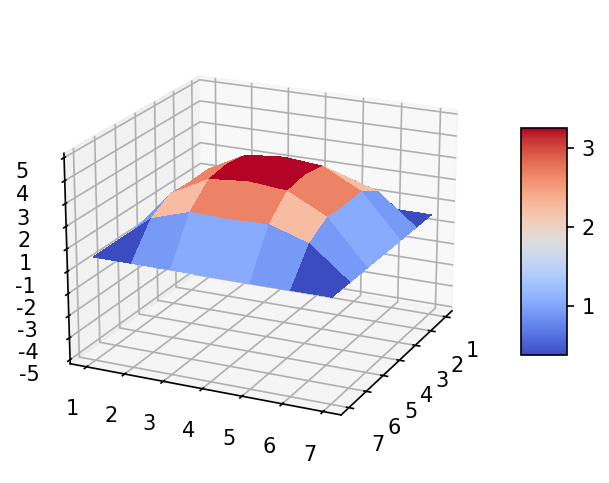

In [122]:
lab1.main()